In [10]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "city_data.csv"
ride_data = "ride_data.csv"

# Read the City and Ride Data
ride_data_df = pd.read_csv(ride_data)
ride_data_df.head()

city_data_df = pd.read_csv(city_data)
city_data_df.head()

city_data_df = city_data_df.drop_duplicates('city')
city_data_df.head()

# Combine the data into a single dataset
pyber_data = pd.merge(city_data_df, ride_data_df, on="city")

# Display the data table for preview
pyber_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

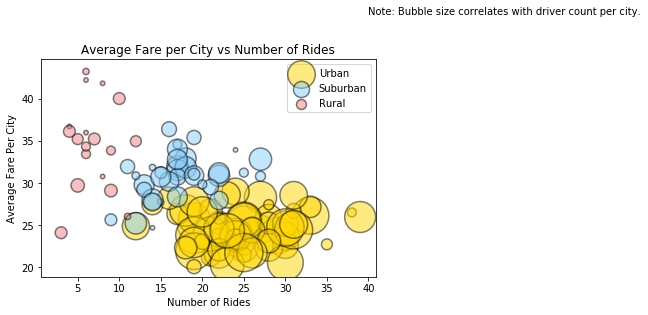

In [11]:
# Obtain the x and y coordinates for each of the three city types
average_fare = pyber_data.groupby("city")["fare"].mean()
average_fare

total_rides = pyber_data.groupby("city")["ride_id"].count()
total_rides

total_drivers = pyber_data.groupby("city")["driver_count"].mean()
total_drivers

city_type = city_data_df.set_index('city')['type']

city_type.value_counts()

pyber_cities = pd.DataFrame({"Average Fare per City":average_fare,
                 "Number of Rides": total_rides,
                 "Number of Drivers": total_drivers,
                 "City Type": city_type
})
pyber_cities.head()

#urban
urban = pyber_cities.loc[pyber_cities["City Type"]== "Urban"]

#suburban
suburban = pyber_cities.loc[pyber_cities["City Type"]== "Suburban"]

#rural
rural = pyber_cities.loc[pyber_cities["City Type"]== "Rural"]

# Build the scatter plots for each city types
#1 Urban
plt.scatter(urban["Number of Rides"], urban["Average Fare per City"], color = "gold", edgecolors="black", s = urban["Number of Drivers"]*20, label = "Urban", alpha = 0.5, linewidth = 1.5)

#2 Suburban
plt.scatter(suburban["Number of Rides"], suburban["Average Fare per City"], color = "lightskyblue", edgecolors ="black", s = suburban["Number of Drivers"]*20, label = "Suburban", alpha = 0.5, linewidth = 1.5)

#3 Rural
plt.scatter(rural["Number of Rides"], rural["Average Fare per City"], color = "lightcoral", edgecolors = "black", s = rural["Number of Drivers"]*20, label = "Rural", alpha = 0.5, linewidth = 1.5)

# Incorporate the other graph properties
plt.title("Average Fare per City vs Number of Rides")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare Per City")


# Create a legend
plt.legend(loc= "upper right")

# Incorporate a text label regarding circle size
plt.text(40, 50,"Note: Bubble size correlates with driver count per city.")

# Save Figure
plt.savefig("../Images/pyber_hw_bubble.png")


## Total Fares by City Type

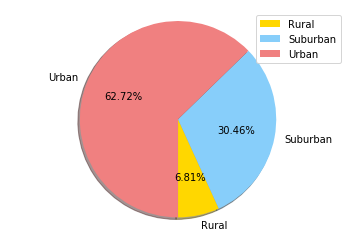

In [12]:
# Calculate Type Percents
city_fare_pie = pyber_data.groupby(["type"])["fare"].sum()
city_fare_pie

# Build Pie Chart
city_fare_pie.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0)
plt.pie(city_fare_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 270)
plt.axis("equal")
plt.legend(loc = "upper right")

# Save Figure
plt.savefig("../Images/pyber_hw_pie_faresbycity.png")


## Total Rides by City Type

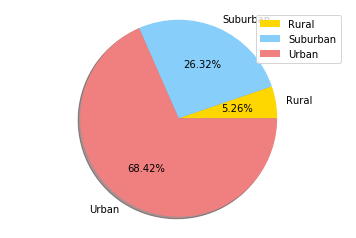

In [13]:
# Calculate Ride Percents
city_rides_pie = pyber_data.groupby(["type"])["ride_id"].count()
city_rides_pie

# Build Pie Chart
city_rides_pie.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0)
plt.pie(city_rides_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True)
plt.axis("equal")
plt.legend(loc = "upper right")

# Save Figure
plt.savefig("../Images/pyber_hw_pie_ridesbycity.png")

## Total Drivers by City Type

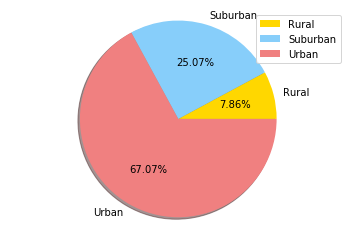

In [14]:
# Calculate Driver Percents
city_drivers_pie = pyber_data.groupby(["type"])["driver_count"].mean()
city_drivers_pie

# Build Pie Charts
city_drivers_pie.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0)
plt.pie(city_drivers_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True)
plt.axis("equal")
plt.legend(loc = "upper right")

# Save Figure
plt.savefig("../Images/pyber_hw_pie_driversbycity.png")